# Exploration of customer purchasing behavior


In [1]:
import pandas as pd
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

In [2]:
from script.EDA import CustomerBehaviorAnalyzer

In [3]:
#instantiate class
analyzer=CustomerBehaviorAnalyzer()

In [4]:
train_df=pd.read_csv("data\\train.csv",low_memory=False)

In [5]:
store_df=pd.read_csv("data\\store.csv")

In [6]:
test_df=pd.read_csv("data\\test.csv")

In [7]:
merged_df = pd.merge(train_df, store_df, on="Store", how="left")

### Check missing values

In [8]:
analyzer.missing_value(store_df)

2024-09-20 16:06:28,750 - INFO - Loading data from file...


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
analyzer.missing_value(test_df)

2024-09-20 16:06:28,773 - INFO - Loading data from file...


Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

### Compare promo distribution 

2024-09-20 16:06:28,830 - INFO - Promo Distribution Comparison: Train vs Test......


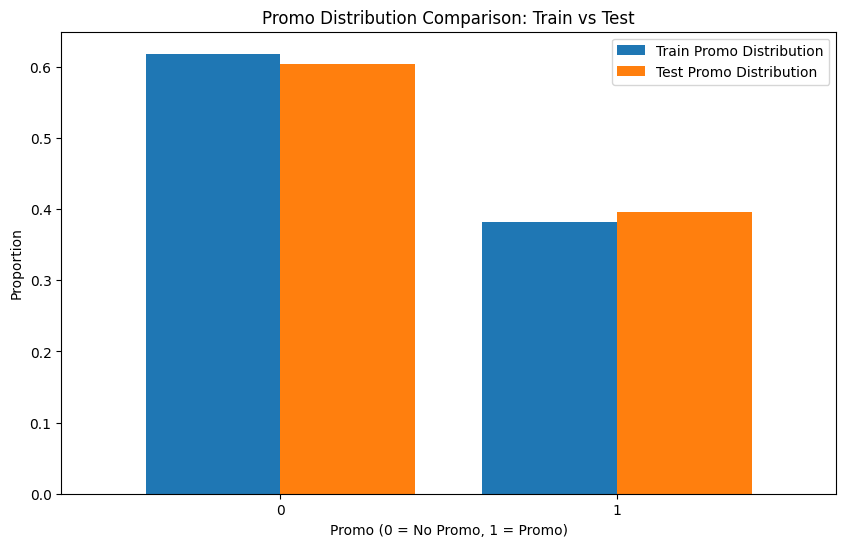

In [10]:
analyzer.compare_promo_distribution(train_df,test_df)

###  Compare sales behavior before, during, and after holidays

2024-09-20 16:06:29,153 - INFO - Compare sales behavior before, during, and after holidays.....


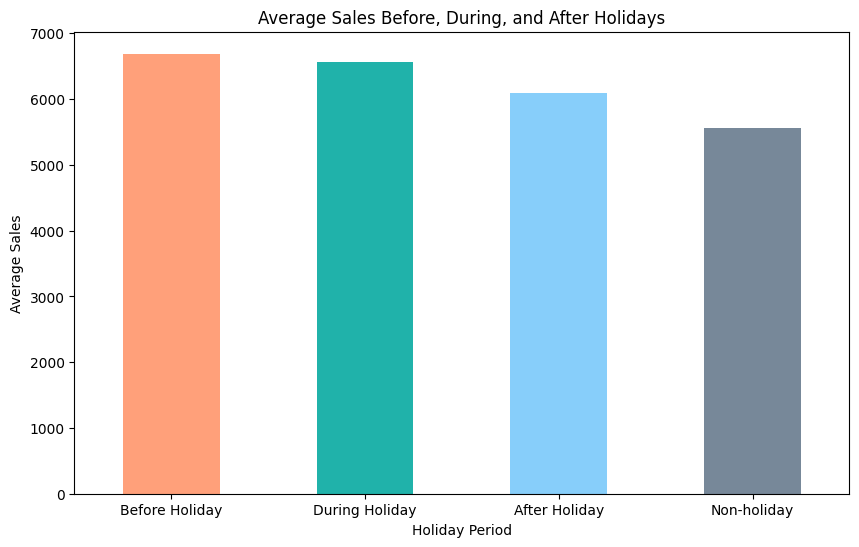

In [11]:
analyzer.compare_sales_holiday_periods(merged_df)

### Seasonal sales behaviors, particularly around major holidays like Christmas and Easter.

2024-09-20 16:06:29,949 - INFO - Analyze seasonal sales behaviors, particularly around major holidays like Christmas and Easter.


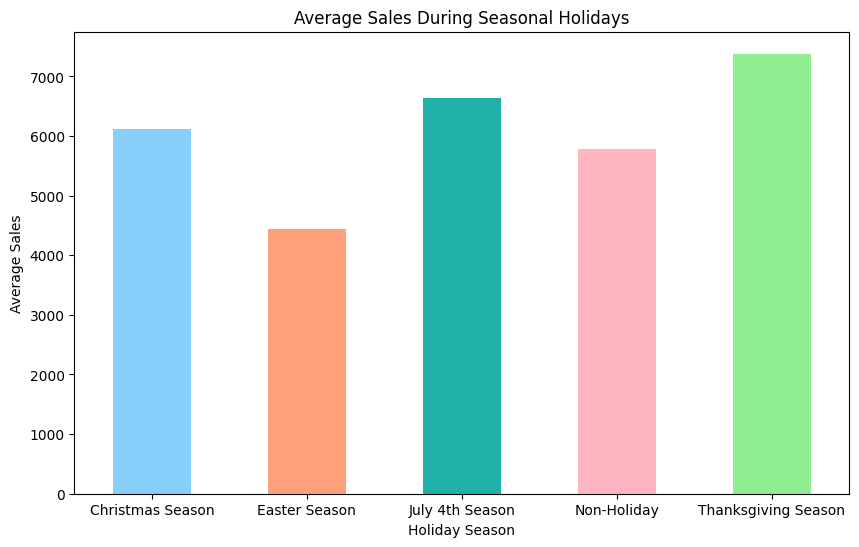

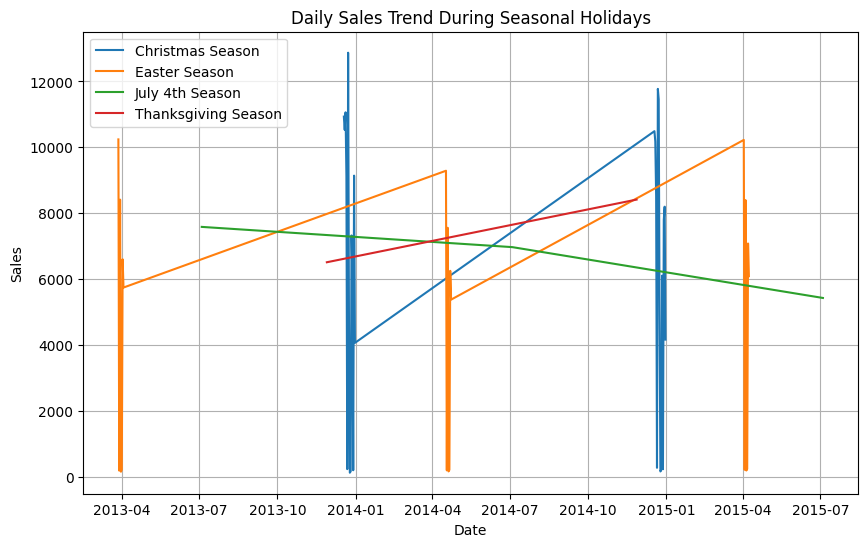

In [12]:
analyzer.analyze_seasonal_sales(merged_df)

### Correlation between customer and sales

2024-09-20 16:07:05,219 - INFO - Correlation between customer and sales


Correlation coefficient between Sales and Customers: 0.8947


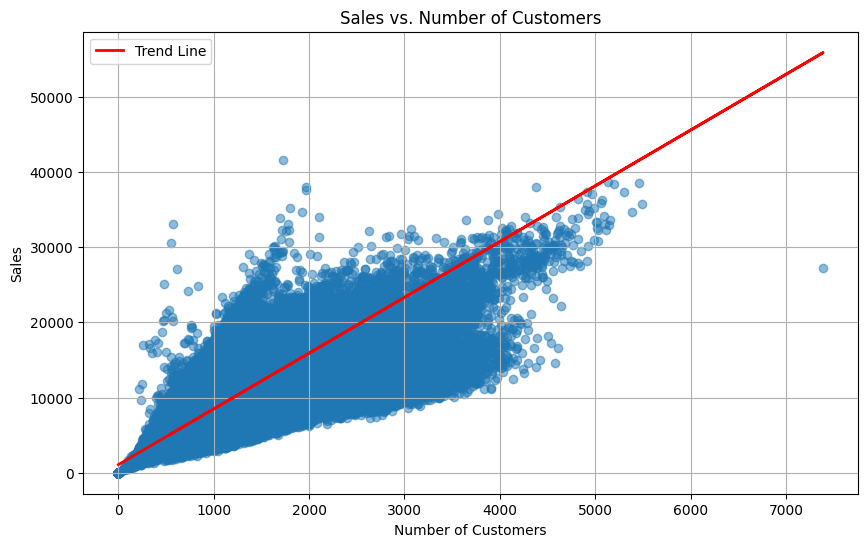

In [13]:
analyzer.analyze_sales_customers_correlation(merged_df)

### Promo effect on sales and customers"

2024-09-20 16:07:09,001 - INFO - Promo effect on sales and customers


Average Sales During Promo: 7991.15
Average Sales During Non-Promo: 4406.05
Average Customers During Promo: 820.10
Average Customers During Non-Promo: 517.82


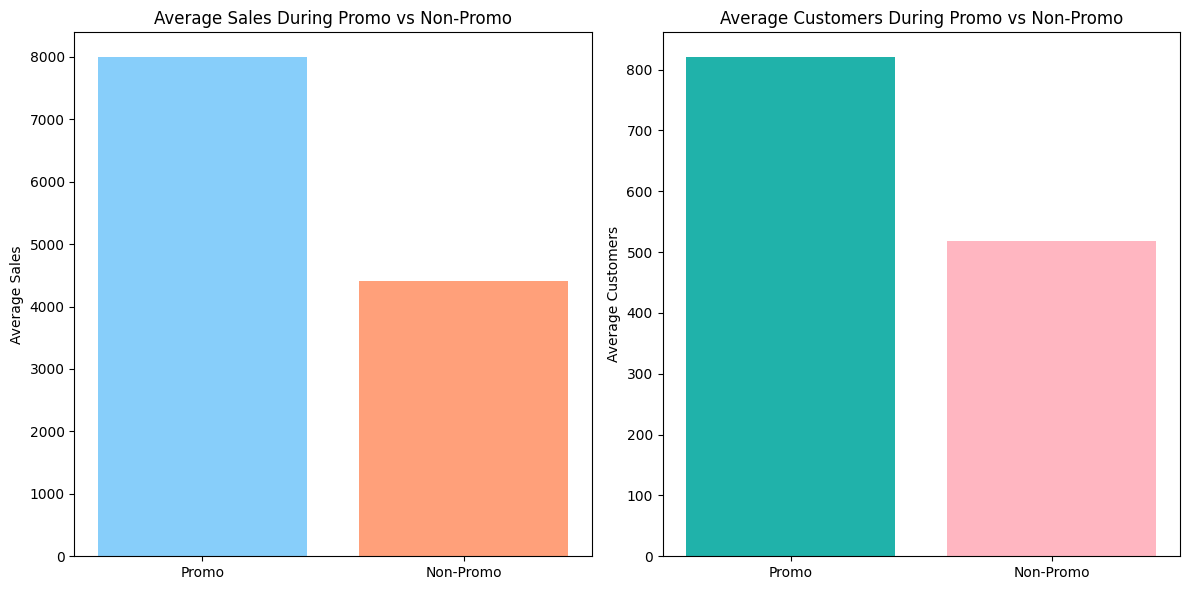

In [14]:
analyzer.analyze_promo_effect(merged_df)

### Effective ways promos can be deployed

2024-09-20 16:07:09,523 - INFO -  effective ways promos can be deployed  


StoreType and Assortment combinations where promos could be effectively deployed:
StoreType: a, Assortment: a
StoreType: a, Assortment: c
StoreType: b, Assortment: a
StoreType: b, Assortment: b
StoreType: b, Assortment: c
StoreType: c, Assortment: a
StoreType: c, Assortment: c
StoreType: d, Assortment: a
StoreType: d, Assortment: c


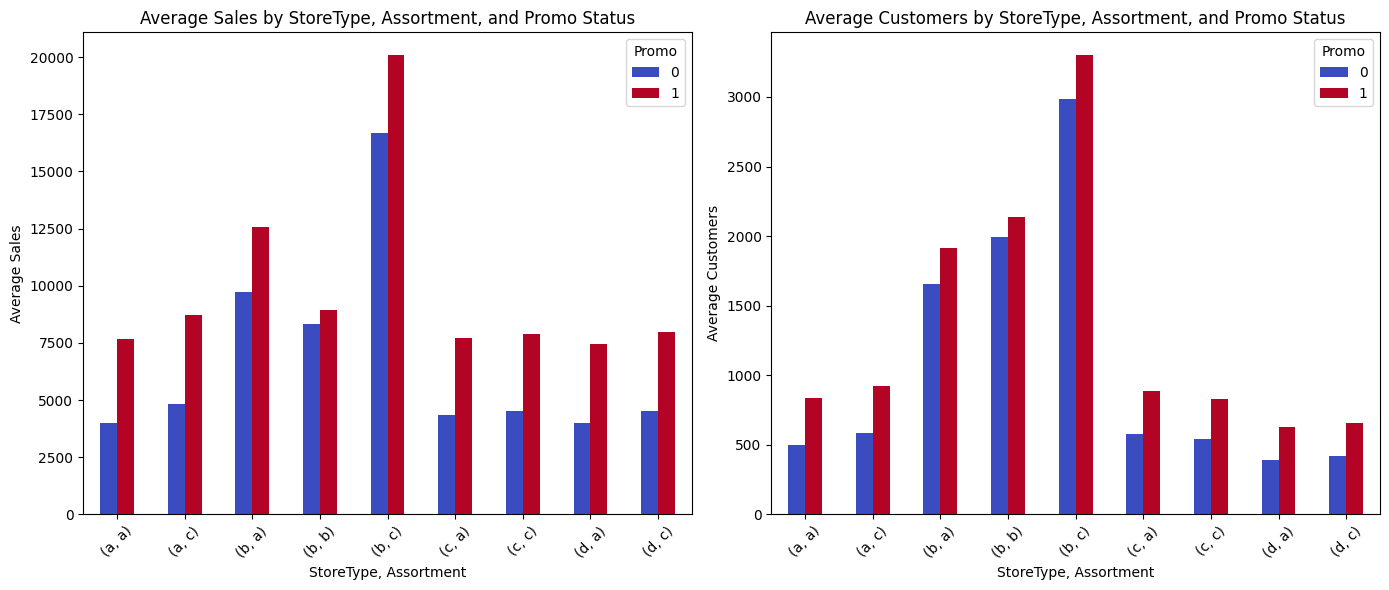

In [15]:
analyzer.analyze_promo_effectiveness_by_store_type_assortment(merged_df)

### Trends of customer behavior during store opening and closing times

2024-09-20 16:07:10,150 - INFO - Trends of customer behavior during store opening and closing times


Average number of customers during open and closed days:
   Open   Customers    Days
0     0    0.000000  172817
1     1  762.728395  844392


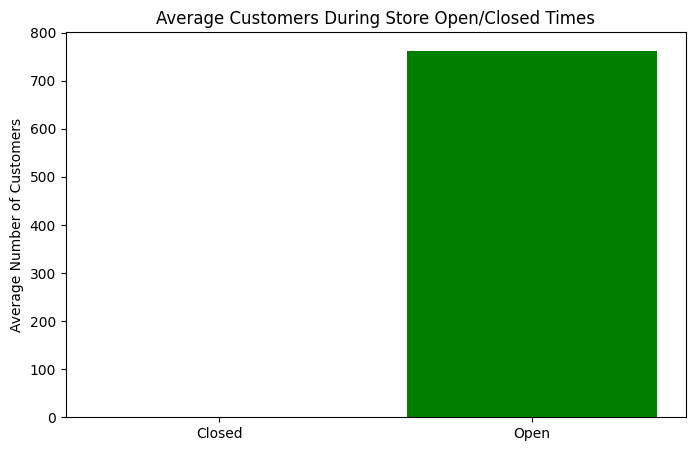

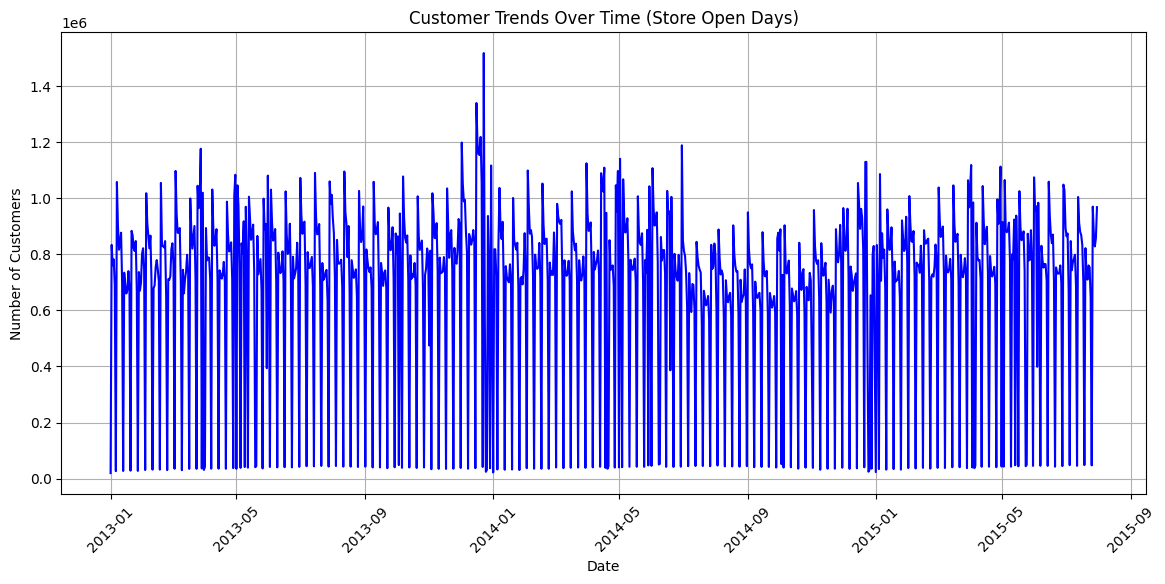

In [16]:
analyzer.analyze_customer_behavior_open_close(merged_df)

### Stores which are open on all weekdays

2024-09-20 16:07:10,834 - INFO - stores which are open on all weekdays


Average weekend sales for stores open all weekdays: 11627.11
Average weekend sales for other stores: 2945.49


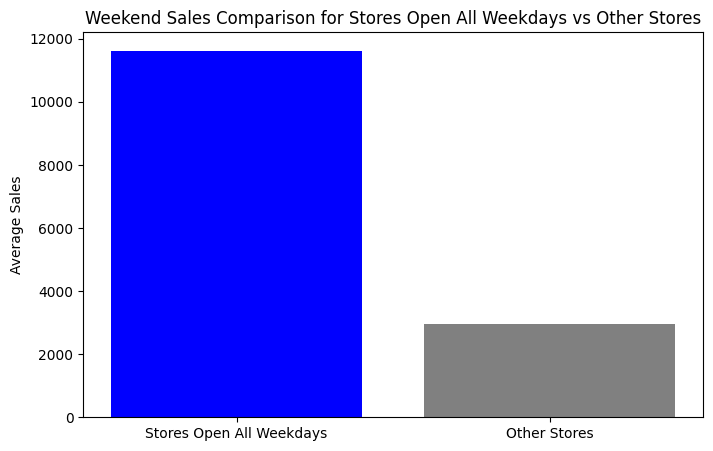

In [17]:
analyzer.analyze_weekday_open_stores(merged_df)

### Sales per assortment types

2024-09-20 16:07:11,309 - INFO - sales per assortment types


Average sales by Assortment type:
  Assortment        Sales
0      Basic  5481.026096
1   Extended  6058.676567
2      Extra  8553.931999


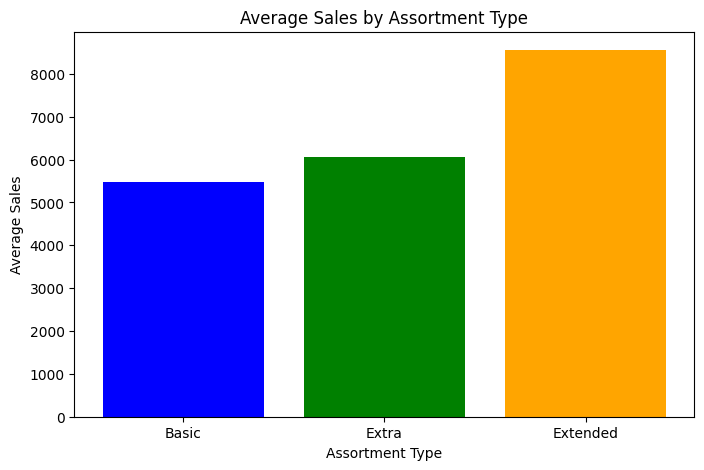

In [18]:
analyzer.analyze_assortment_sales(merged_df)

### Effect of competitor distance

2024-09-20 16:07:11,786 - INFO - Effect of competitor distance


Average sales by competition distance range:
  DistanceRange        Sales
0        0-500m  6307.393560
1     500-1000m  5565.373637
2         1-5km  5675.492669
3        5-10km  5567.718124
4         10km+  5685.546657


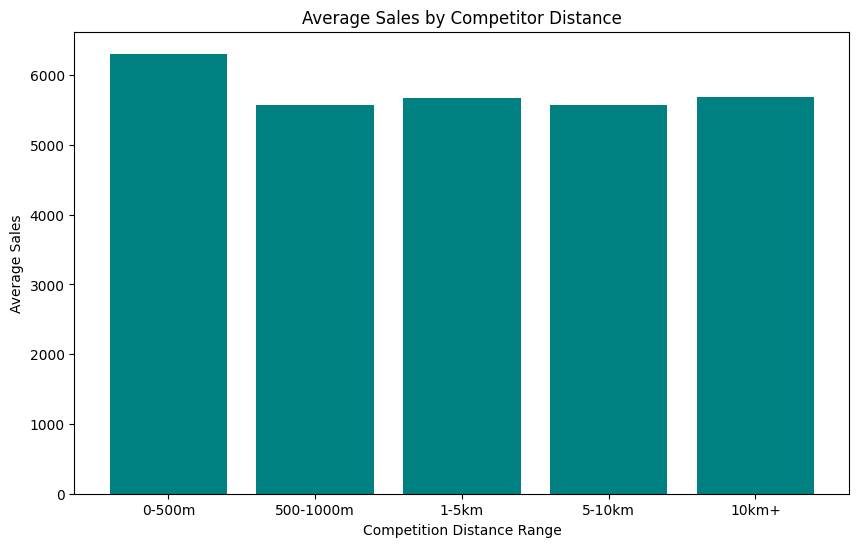


Average Sales Comparison between City Center and Non-City Center Stores:
          Location  Average Sales
0      City Center    6050.127990
1  Non-City Center    5655.572431


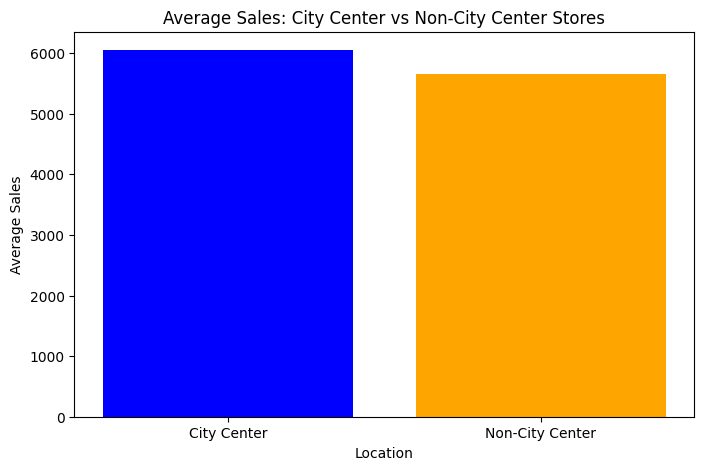

In [19]:
analyzer.analyze_competition_distance_sales(merged_df)

### Arrival of New competitor impact

2024-09-20 16:07:12,316 - INFO - new competitor impact


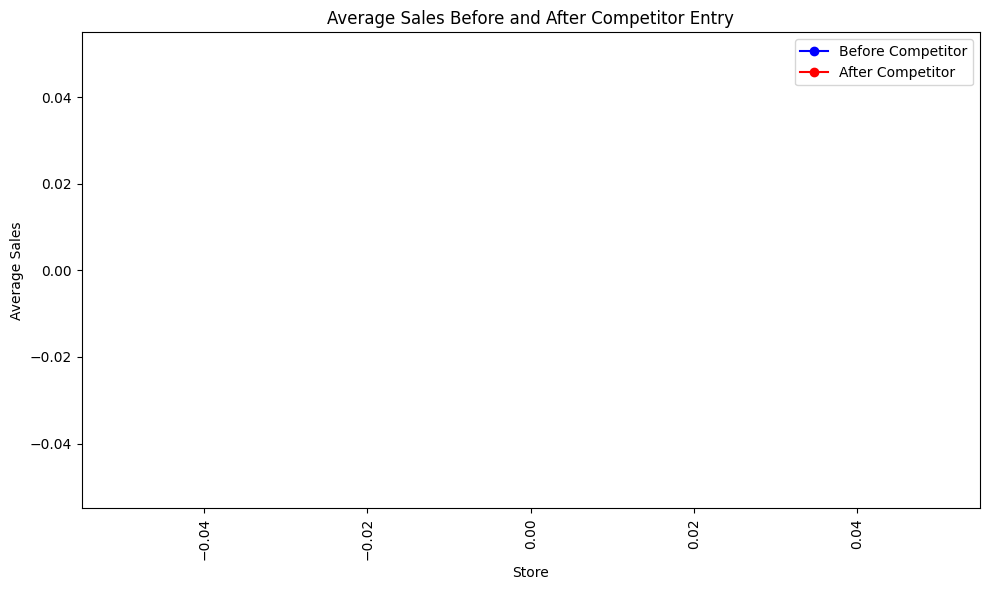


Average sales comparison (Before vs After competitor entry):
Empty DataFrame
Columns: [AvgSalesBefore, AvgSalesAfter, Difference]
Index: []


In [20]:
analyzer.analyze_new_competitor_impact(merged_df)

In [25]:
merged_df['CompetitionInitiallyNA'] = merged_df.groupby('Store')['CompetitionDistance'].transform(lambda x: x.ffill().isna())
merged_df['CompetitionInitiallyNA'].value_counts()
# merged_df.columns
merged_df['CompetitionDistance'].isnull().sum()

np.int64(0)